In [1]:
import tensorflow as tf
import os

In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
tf.config.list_physical_devices('GPU')

[]

In [4]:
import cv2
import imghdr

In [5]:
data_dir = 'asset/data' 
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [6]:
if not os.path.exists(data_dir):
    print("Directorul specificat nu există:", data_dir)
    
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [7]:
import numpy as np
from matplotlib import pyplot as plt

In [8]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 101 files belonging to 2 classes.


In [9]:
data_iterator = data.as_numpy_iterator()

In [10]:
batch = data_iterator.next()

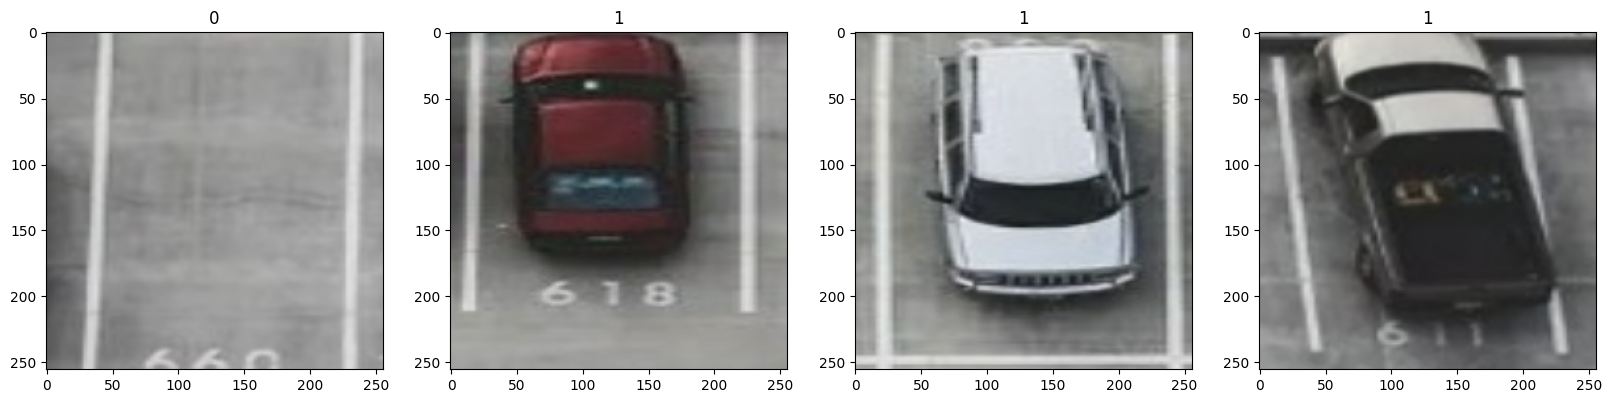

In [11]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [12]:
data = data.map(lambda x,y: (x/255, y))

In [13]:
data.as_numpy_iterator().next()

(array([[[[0.5882353 , 0.5921569 , 0.5764706 ],
          [0.5886259 , 0.5925475 , 0.576731  ],
          [0.5928079 , 0.59672946, 0.579519  ],
          ...,
          [0.50283396, 0.50283396, 0.4949908 ],
          [0.5056219 , 0.5056219 , 0.4977788 ],
          [0.5058824 , 0.5058824 , 0.49803922]],
 
         [[0.5894455 , 0.59336704, 0.5764706 ],
          [0.5897557 , 0.59363717, 0.5766908 ],
          [0.59307736, 0.59652853, 0.5790487 ],
          ...,
          [0.504583  , 0.50505334, 0.49721023],
          [0.50909173, 0.5091319 , 0.5012888 ],
          [0.50951284, 0.50951284, 0.5016697 ]],
 
         [[0.5915594 , 0.595481  , 0.5764706 ],
          [0.59172934, 0.59554046, 0.57662064],
          [0.59354806, 0.59617764, 0.578227  ],
          ...,
          [0.5076384 , 0.5089304 , 0.50108725],
          [0.5151529 , 0.5152632 , 0.50742006],
          [0.5158548 , 0.5158548 , 0.50801164]],
 
         ...,
 
         [[0.80716914, 0.8110907 , 0.8032476 ],
          [0.80742

In [14]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [15]:
train_size

2

In [16]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [17]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [19]:
model = Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

c:\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [20]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.5625 - loss: 0.8338 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 2/20


c:\Python\Python310\lib\contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 810ms/step - accuracy: 0.8750 - loss: 0.5445 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 365ms/step - accuracy: 0.8854 - loss: 0.5019 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 388ms/step - accuracy: 0.9479 - loss: 0.3446 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 434ms/step - accuracy: 0.9792 - loss: 0.2549 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 349ms/step - accuracy: 0.9583 - loss: 0.1943 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 362ms/step - accuracy: 1.0000 - loss: 0.0841 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 367ms/step - accuracy: 1.0000 - loss: 0.0306 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 9/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 368ms/step - accuracy: 1.0000 - lo

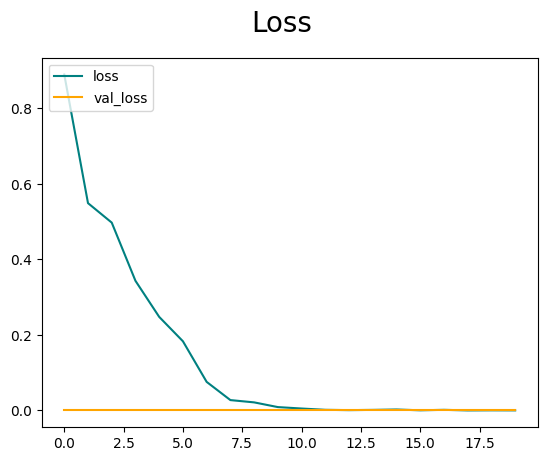

In [22]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

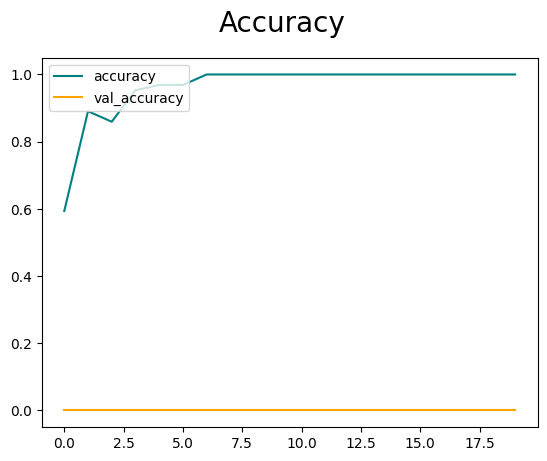

In [23]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [24]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [25]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [26]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [27]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


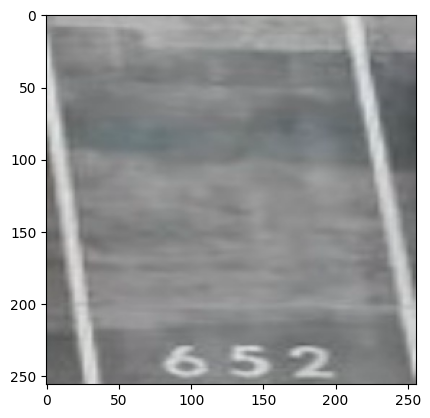

In [54]:
import cv2
img = cv2.imread('asset/resized_livephotoes/44.jpg')
plt.imshow(img)
plt.show()


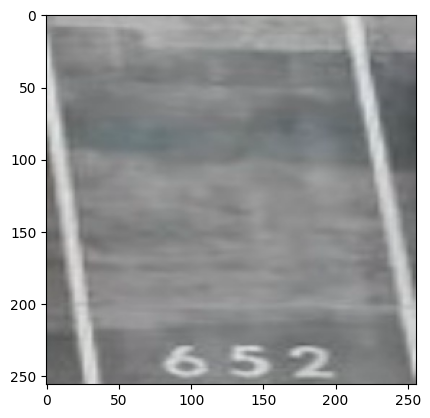

In [55]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [56]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


In [57]:
yhat

array([[1.9832462e-06]], dtype=float32)

In [58]:
if yhat > 0.5: 
    print(f'Predicted class is occ')
else:
    print(f'Predicted class is mpty')

Predicted class is mpty


In [43]:
from tensorflow.keras.models import load_model

In [44]:
model.save(os.path.join('asset/models','occ_or_mptyy.h5'))

In [45]:
new_model = load_model('asset/models/occ_or_mpty.h5')

In [46]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


array([[0.9993051]], dtype=float32)